#  PCA Implementation
Author: George Chen (georgechen [at symbol] cmu.edu) and Akanksha Rawat

This demo is heavily based on Mark Richardson's 2009 "Principle Component Analysis" notes and uses data he pulled from DEFRA on 1997 UK food consumption (grams/person/week). This dataset is also used as a nice illustrated example of PCA here:
http://setosa.io/ev/principal-component-analysis/

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # prettier plots
import numpy as np

# grams per person per week
food_data = np.array([[105, 103, 103, 66],
                      [245, 227, 242, 267],
                      [685, 803, 750, 586],
                      [147, 160, 122, 93],
                      [193, 235, 184, 209], 
                      [156, 175, 147, 139],
                      [720, 874, 566, 1033],
                      [253, 265, 171, 143],
                      [488, 570, 418, 355],
                      [198, 203, 220, 187],
                      [360, 365, 337, 334],
                      [1102, 1137, 957, 674],
                      [1472, 1582, 1462, 1494],
                      [57, 73, 53, 47],
                      [1374, 1256, 1572, 1506],
                      [375, 475, 458, 135],
                      [54, 64, 62, 41]])
row_labels = ['Cheese',
              'Carcass meat',
              'Other meat',
              'Fish',
              'Fats and oils',
              'Sugars',
              'Fresh potatoes',
              'Fresh Veg',
              'Other Veg',
              'Processed potatoes',
              'Processed Veg',
              'Fresh fruit',
              'Cereals',
              'Beverages',
              'Soft drinks',
              'Alcoholic drinks',
              'Confectionary']
column_labels = ['England', 'Wales', 'Scotland', 'N Ireland']

first_column_width = 20
other_columns_width = 15

# print header
print("".ljust(first_column_width), end='')
for column_label in column_labels:
    print(column_label.rjust(other_columns_width), end='')
print()

# print each row in the numpy array with a column label
for row_label, row in zip(row_labels, food_data):
    print(row_label.ljust(first_column_width), end='')
    print("".join([("%d" % x).rjust(other_columns_width) for x in row]))

                            England          Wales       Scotland      N Ireland
Cheese                          105            103            103             66
Carcass meat                    245            227            242            267
Other meat                      685            803            750            586
Fish                            147            160            122             93
Fats and oils                   193            235            184            209
Sugars                          156            175            147            139
Fresh potatoes                  720            874            566           1033
Fresh Veg                       253            265            171            143
Other Veg                       488            570            418            355
Processed potatoes              198            203            220            187
Processed Veg                   360            365            337            334
Fresh fruit                 

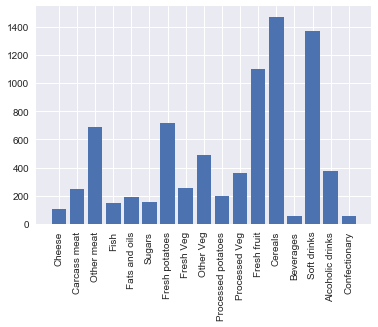

In [2]:
'''
Food distribution for england
'''
plt.bar(range(len(row_labels)), food_data[:, 0])
plt.xticks(range(len(row_labels)), row_labels, rotation=90)
plt.show()

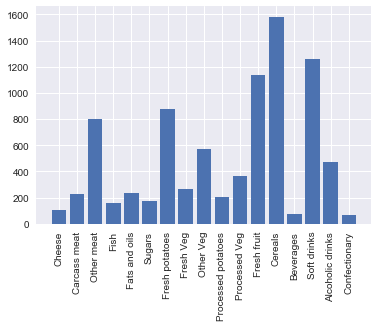

In [3]:
'''
Food distribution for Wales
'''
plt.bar(range(len(row_labels)), food_data[:, 1])
plt.xticks(range(len(row_labels)), row_labels, rotation=90)
plt.show()

In [4]:
# food_data.T

In [5]:
from sklearn.decomposition import PCA

single_dimension_pca = PCA(n_components=1)  # project data down to a single dimension
single_dimension_food_data = single_dimension_pca.fit_transform(food_data.T)
single_dimension_food_data

# len(single_dimension_food_data)

array([[-144.99315218],
       [-240.52914764],
       [ -91.869339  ],
       [ 477.39163882]])

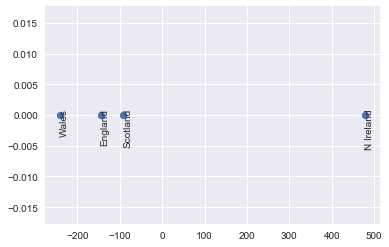

In [6]:
from sklearn.decomposition import PCA

single_dimension_pca = PCA(n_components=1)  # project data down to a single dimension
single_dimension_food_data = single_dimension_pca.fit_transform(food_data.T)

# matplotlib doesn't have a built-in 1D scatter plot but we can
# just use a 2D scatter plot with y-axis values all set to 0
y_axis_all_zeros = np.zeros(len(single_dimension_food_data))

plt.scatter(single_dimension_food_data, y_axis_all_zeros)
for idx in range(len(single_dimension_food_data)):
    plt.annotate(column_labels[idx], (single_dimension_food_data[idx], y_axis_all_zeros[idx]), rotation=90)

In [7]:
single_dimension_pca.explained_variance_ratio_

array([0.67444346])

For any data point in the original 17-dimensional space, we can see what the PCA single-dimensional representation is using the `transform` function. For example, in the next cell, we compute the 1D projections for both England and Wales. However, we could actually plug in data that we didn't fit the PCA model with (for example, if we collected the 17 measurements for Pennsylvania, we could use it with transform as well, etc).

In [8]:
single_dimension_pca.transform([food_data[:, 0], food_data[:, 1]])

array([[-144.99315218],
       [-240.52914764]])

## Interpretation

How do we interpret the low-dimensional representation? Why is North Ireland so far away from the other points? One way to try to answer this question is to first look at what features (i.e., what specific food/drink items) are being assigned high weight by PCA:

In [26]:
# food_data[0,:].mean()

In [9]:
print(food_data[:,0])
food_data[:,0].mean()

[ 105  245  685  147  193  156  720  253  488  198  360 1102 1472   57
 1374  375   54]


469.6470588235294

In [10]:
print(single_dimension_pca.components_[0])  # index 0 is for the 1st principal component (since Python starts counting at 0)

[-0.05695538  0.04792763 -0.25891666 -0.08441498 -0.00519362 -0.03762098
  0.40140206 -0.15184994 -0.24359373 -0.02688623 -0.03648827 -0.6326409
 -0.04770286 -0.02618776  0.23224414 -0.46396817 -0.0296502 ]


Importantly, how PCA (that has already been fitted) actually projects a data point to 1D is to take a weighted combination using the above weights (although it first subtracts off the feature means). Specifically, here are the calculations for England and Wales:

In [37]:
np.inner(single_dimension_pca.components_[0],
         food_data[:, 0] - single_dimension_pca.mean_)

-144.9931521820767

In [12]:
np.inner(single_dimension_pca.components_[0],
         food_data[:, 1] - single_dimension_pca.mean_)

-240.52914763517668

Weights with larger absolute value correspond to features that lead to the largest spread along the projected 1D axis.

Here's some code to rank the weights by largest absolute value to smallest absolute value:

In [13]:
abs_val_of_1st_principal_component_weights = np.abs(single_dimension_pca.components_[0])

# in the previous lecture we saw the `sorted` function; now we introduce numpy's `argsort`,
# which does *not* return the sorted list but instead returns the rearranged indices that
# would sort the list (put another way, it returns rankings)
ranking_of_largest_to_smallest = np.argsort(-abs_val_of_1st_principal_component_weights)  
# use negative to get largest to smallest

# now print out the food items having highest to lowest absolute value weight
for rank in ranking_of_largest_to_smallest:
    print(row_labels[rank], ':', single_dimension_pca.components_[0][rank])

Fresh fruit : -0.6326408978722375
Alcoholic drinks : -0.46396816797670637
Fresh potatoes : 0.4014020602962481
Other meat : -0.25891665833612115
Other Veg : -0.24359372899027432
Soft drinks : 0.23224414047289457
Fresh Veg : -0.1518499415623022
Fish : -0.08441498252508357
Cheese : -0.056955379785685246
Carcass meat : 0.04792762813468533
Cereals : -0.047702858373648974
Sugars : -0.03762098283940197
Processed Veg : -0.03648826911159384
Confectionary : -0.029650201087993877
Processed potatoes : -0.026886232536746935
Beverages : -0.026187755908533464
Fats and oils : -0.005193622660047768


At this point, we leave the following as an exercise to you: for a few of the food/drink items with the highest absolute value weight, compare the values between the different regions of the UK. Can you see why North Ireland is considered very different from the other regions?

### Two Dimensional PCA

In [30]:
food_data.shape

(17, 4)

In [31]:
two_dimension_pca = PCA(n_components=2)  # project data down to a single dimension
two_dimension_food_data = two_dimension_pca.fit_transform(food_data.T)

In [32]:
print(two_dimension_pca.explained_variance_ratio_)
two_dimension_pca.explained_variance_ratio_.sum()

[0.67444346 0.29052475]


0.9649682097346034

In [33]:
two_dimension_food_data

array([[-144.99315218,   -2.53299944],
       [-240.52914764, -224.64692488],
       [ -91.869339  ,  286.08178613],
       [ 477.39163882,  -58.90186182]])

In [49]:
print('New first component for England')
print(np.inner(two_dimension_pca.components_[0], food_data[:,0]-two_dimension_pca.mean_))

print('New second component for England')
print(np.inner(two_dimension_pca.components_[1], food_data[:,0]-two_dimension_pca.mean_))

New first component for England
-144.9931521820767
New second component for England
-2.532999437040614


In [50]:
print('New first component for Wales')
print(np.inner(two_dimension_pca.components_[0], food_data[:,1]-two_dimension_pca.mean_))

print('New second component for Wales')
print(np.inner(two_dimension_pca.components_[1], food_data[:,1]-two_dimension_pca.mean_))

New first component for Wales
-240.52914763517668
New second component for Wales
-224.64692488126897


In [48]:
two_dimension_pca.mean_

array([  94.25,  245.25,  706.  ,  130.5 ,  205.25,  154.25,  798.25,
        208.  ,  457.75,  202.  ,  349.  ,  967.5 , 1502.5 ,   57.5 ,
       1427.  ,  360.75,   55.25])

In [47]:
print(np.inner(two_dimension_pca.components_[0], food_data[:,0]-food_data[:,0].mean()))

-35.853349917501816


In [34]:
food_data[:,0].mean()

469.6470588235294

In [42]:
two_dimension_pca.components_[0]


array([-0.05695538,  0.04792763, -0.25891666, -0.08441498, -0.00519362,
       -0.03762098,  0.40140206, -0.15184994, -0.24359373, -0.02688623,
       -0.03648827, -0.6326409 , -0.04770286, -0.02618776,  0.23224414,
       -0.46396817, -0.0296502 ])

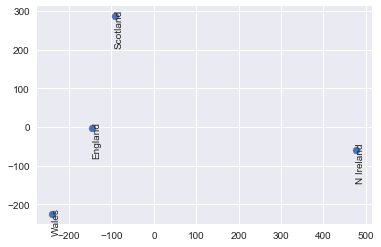

In [18]:
plt.scatter(two_dimension_food_data[:,0],two_dimension_food_data[:,1])
for idx in range(len(two_dimension_food_data)):
    plt.annotate(column_labels[idx], (two_dimension_food_data[idx,0],two_dimension_food_data[idx,1]), rotation=90)


In [19]:
import pandas as pd
abs_val_of_1st_principal_component_weights = np.abs(two_dimension_pca.components_[0])
abs_val_of_2nd_principal_component_weights = np.abs(two_dimension_pca.components_[1])
'''
Using the raw values
'''
comp_weights = [two_dimension_pca.components_[0].tolist(),
                two_dimension_pca.components_[1].tolist()]
comp_weights = pd.DataFrame(np.array(comp_weights).T, columns=['Pc1','Pc2'], index=row_labels)


In [20]:
comp_weights.iloc[(-np.abs(comp_weights['Pc1'].values)).argsort()]

,Pc1,Pc2
Fresh fruit,-0.632641,-0.177741
Alcoholic drinks,-0.463968,0.113537
Fresh potatoes,0.401402,-0.715017
Other meat,-0.258917,-0.015331
Other Veg,-0.243594,-0.225451
Soft drinks,0.232244,0.555124
Fresh Veg,-0.151850,-0.144900
Fish,-0.084415,-0.050755
Cheese,-0.056955,0.016013
Carcass meat,0.047928,0.013916


### PCA with 3 components

In [21]:
three_dimension_pca = PCA(n_components=3)  # project data down to a single dimension
three_dimension_food_data = three_dimension_pca.fit_transform(food_data.T)

In [22]:
print(three_dimension_pca.explained_variance_ratio_)
three_dimension_pca.explained_variance_ratio_.sum()

[0.67444346 0.29052475 0.03503179]


0.9999999999999999

In [23]:
three_dimension_food_data

array([[-144.99315218,   -2.53299944,  105.76894504],
       [-240.52914764, -224.64692488,  -56.47555471],
       [ -91.869339  ,  286.08178613,  -44.41549498],
       [ 477.39163882,  -58.90186182,   -4.87789535]])

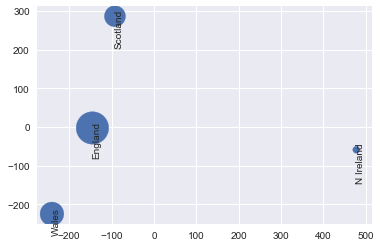

In [24]:
'''
Using the absolute value of third component to make plot
'''
plt.scatter(three_dimension_food_data[:,0],three_dimension_food_data[:,1],
            s=np.abs(three_dimension_food_data[:,2])*10 )
for idx in range(len(three_dimension_food_data)):
    plt.annotate(column_labels[idx], (two_dimension_food_data[idx,0],
                                      two_dimension_food_data[idx,1]), rotation=90)
